## Assignment 2: Evaluating Regression Models
NOTE : PLEASE DO NOT POST/SHARE THE CODE OR YOUR SOLUTIONS ON THE WEB/GIT except CANVAS FOR GRADING

References : 
https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d
https://www.kaggle.com/c/house-prices-advanced-regression-techniques
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
https://www.kaggle.com/henriqueyamahata/boston-housing-with-linear-regression#Trainning-Linear-Regression-Model
https://medium.com/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a 

Problem Statement : Advising a real estate brokerage firm to assess the market value of residential real estate.

Background Materials/Data :
This  assignment involves fitting regression models with Python. You are asked to fit regression models to data from the Boston Housing Study. For your convenience, the data set (comma-delimited file boston.csv) and initial code for reading those data into Python are below.

Instructions:
- Use all explanatory variables (with the exception of neighborhood) and all 506 census tract observations from the Boston Housing Study. Use one of two response variables: 
   (1) the median value of homes in thousands of 1970 dollars or 
   (2) the log median value of homes in thousands of 1970 dollars. 
- Employ at least TWO regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, ridge regression, lasso regression, and elastic net. 
- Evaluate these methods within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error.
- Python scikit-learn should be your primary environment for conducting this research. Note that it is not necessary to employ polynomial regression in this assignment.


Deliverables and File Formats
Please use this notebook to update comments. Upload your notebook/knitted HTML file in canvas for grading and also include the jupyter notebook/code. Feel free to delete/add/update code as needed based on your own research and implementation style

Formatting Python Code
Refer to Google’s Python Style Guide (https://google.github.iostyleguide/pyguide.html) for ideas about formatting Python code:

NOTE : 
- Below is the starter code and please feel free to update/edit/change to provide your thoughts/solutions to the problem. 
- Comment often and in detail, highlighting major sections of code, describing the thinking behind the methods being employed.
- This code has a lot of errors (intentionally, including the data dictionary) make sure to update all the cells based on best practices along with your analysis/findings.



GRADING GUIDELINES (100 points)
--------------------------------
(1) Data preparation, exploration, visualization (20 points)
(2) Review research design and modeling methods (20 points)
(3) Review results, evaluate models (20 points)
(4) Implementation and programming (20 points)
(5) Exposition, problem description, and management recommendations (20 points)


Dataset

Variable         Name Description
-------------------------------------
crim - per capita crime rate by town<br>
zn - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
indus - proportion of non-retail business acres per town.<br>
chas - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
nox - nitric oxides concentration (parts per 10 million)<br>
rooms - average number of rooms per dwelling<br>
age - proportion of owner-occupied units built prior to 1940<br>
dis - weighted distances to five Boston employment centres<br>
rad - index of accessibility to radial highways<br>
tax - full-value property-tax rate per 10,000<br>
ptratio - pupil-teacher ratio by town<br>
lstat - lower status of the population<br>
mv - Median value of owner-occupied homes in 1000's<br>



Note: Try to see if you can embed this structure ( ML end to end pipeline )
- Look at the big picture.
- Get the data.
- Discover and visualize the data to gain insights.
- Prepare the data for Machine Learning algorithms.
- Select a model and train it.
- Fine-tune your model.
- Present your solution.


### Import Library

In [1]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

In [14]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [49]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.stats import norm, skew

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation

In [4]:
# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

In [5]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

In [6]:
# Although we standardize X and y variables on input, we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

### Get the data & Big picture

In [ ]:
#S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#S3 Establish working directory
import os # Operation System
os.getcwd()
%cd /content/gdrive/My Drive/Assignments/2/
!pwd
!ls
print('Working Directory')
print(os.getcwd())
work_dir = "/content/gdrive/My Drive/Assignments/2/"

In [12]:
# read data for the Boston Housing Study
# creating data frame restdata
# work_dir =""
boston_input = pd.read_csv(work_dir+'./data/boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first five rows):')
boston_input.head(5)


boston DataFrame (first five rows):


,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [65]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)

print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rooms    506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  mv       506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


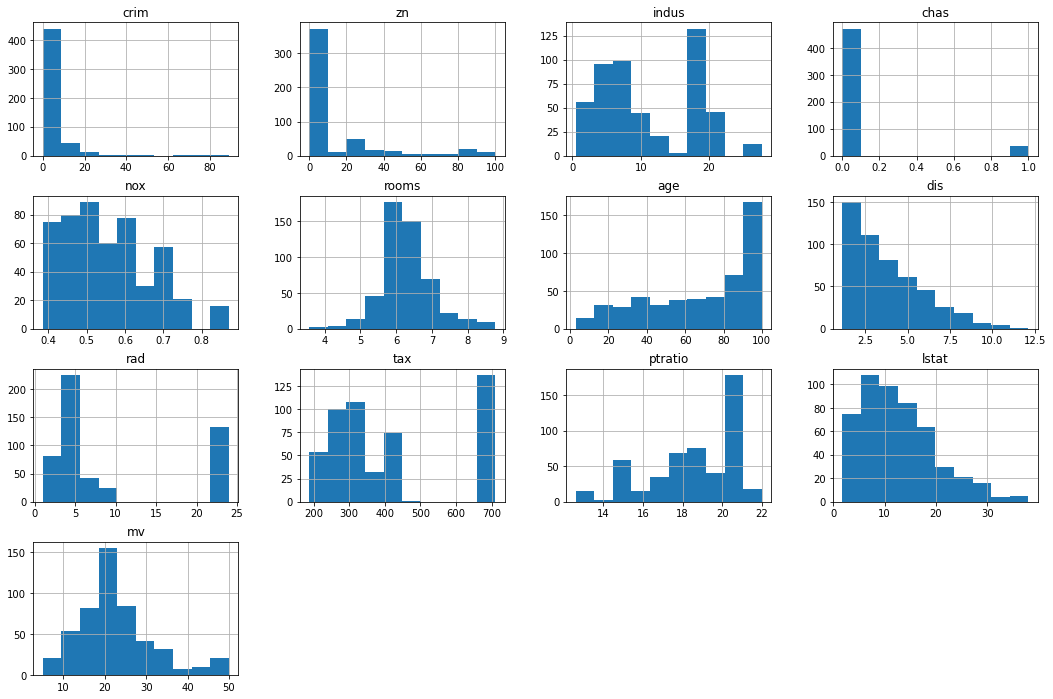

In [24]:
# Check distributions of non-categorical variables for boston housing by histogram
boston.hist(figsize=(18,12))
plt.show()

rooms and lstat have high correlation with mv

<Figure size 432x288 with 0 Axes>

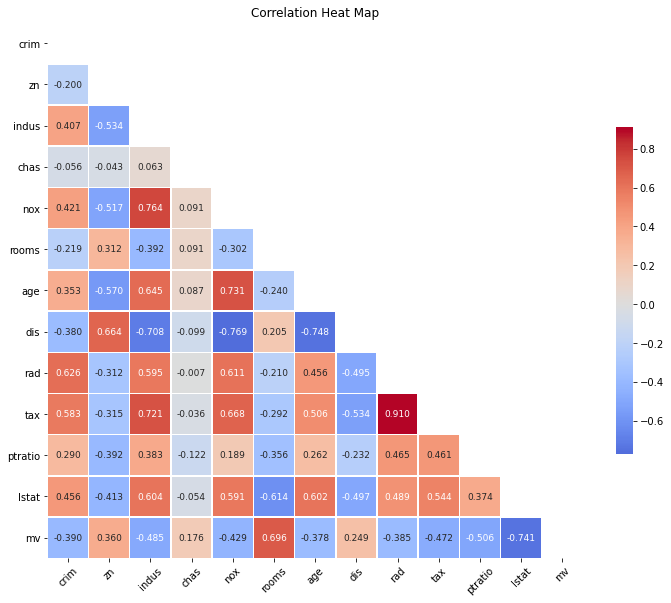

In [17]:
# examine correlations among boston housing data set
# with correlation matrix/heat map
corr_chart(df_corr = boston) 

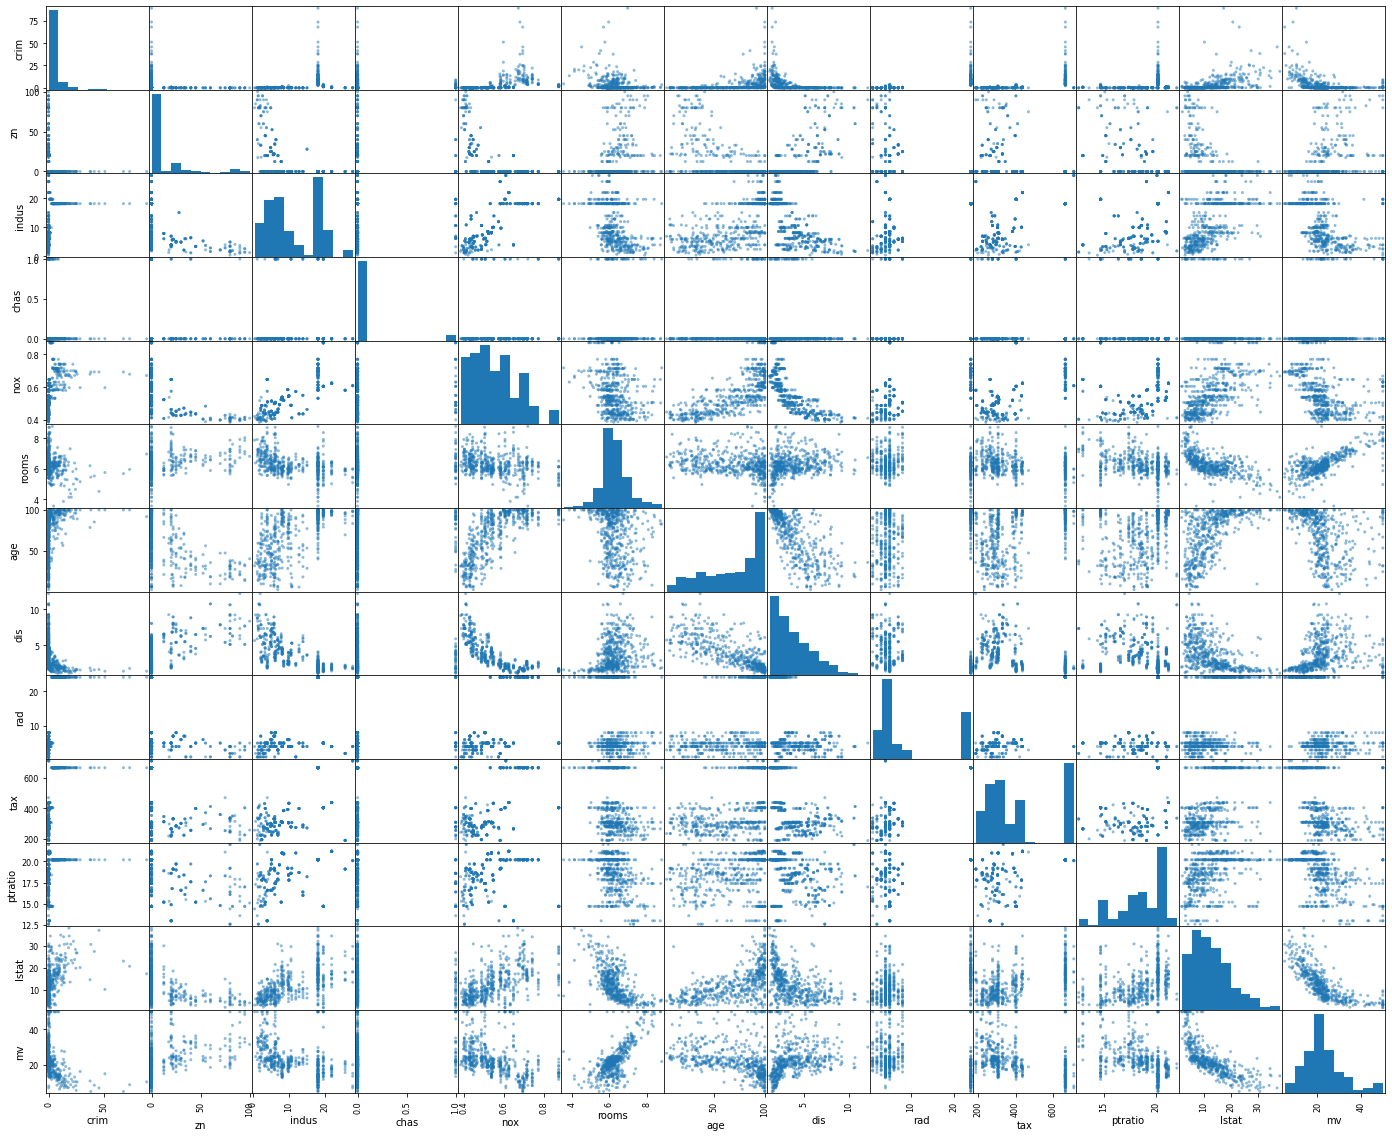

In [73]:
#Creare scatter plots of boston houisng data set. 
scatter_matrix(boston, figsize=(24, 20))
plt.show('Scatter Plot Matrix of boston data set')

### Feature transformation
 

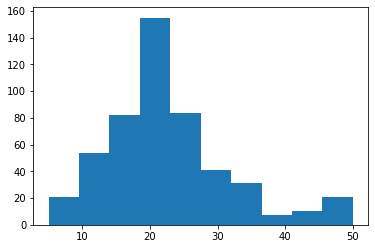

In [25]:
# Single histogram of response variable : Median Value
plt.hist(boston['mv'])
plt.show('plot-histogram-boston-mv')

There are not any outliers that are looks like entry mistakes

In [16]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

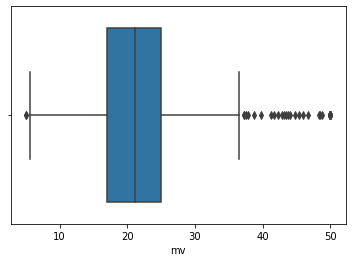

In [61]:
#boxplot
sns.boxplot(boston['mv'])
plt.show()

Data is not too skewed since skew is within -3 and 3. Thus, we don't have to log transform it.

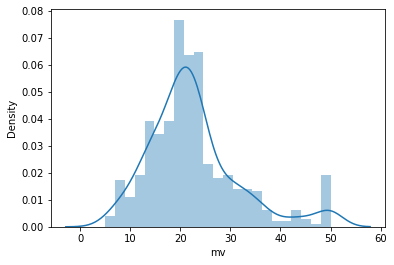

Skew
 1.1109118502479587
Kurt
 1.5167834480843294


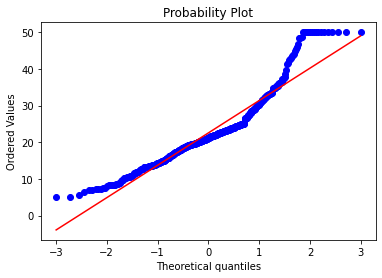

In [64]:
# Data is not too skewed
sns.distplot(boston['mv'])
plt.show()
stats.probplot(boston['mv'], plot=plt)
print("Skew of mv\n",boston['mv'].skew())
print("Kurt of mv\n", boston['mv'].kurt())

We will box-cox transform the crim and chas since those are out of range of -3, 3

In [130]:
print("Skew of mv\n",boston.skew())
print("Kurt of mv\n", boston.kurt())

Skew of mv
 crim       0.983187
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rooms      0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
lstat      0.906460
mv         1.110912
dtype: float64
Kurt of mv
 crim      -0.442318
zn         4.031510
indus     -1.233540
chas       9.638264
nox       -0.064667
rooms      1.891500
age       -0.967716
dis        0.487941
rad       -0.867232
tax       -1.142408
ptratio   -0.285091
lstat      0.493240
mv         1.516783
dtype: float64


In [114]:
from scipy.special import boxcox1p
boston['crim'] = boxcox1p(boston['crim'], 0.15)
boston['chas'] = boxcox1p(boston['chas'], 0.15)

In [131]:
print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   0.550142    11.363636   11.136779   0.050526    0.554695    6.284634     
std    0.608913    23.322453   6.860353    0.185533    0.115878    0.702617     
min    0.006286    0.000000    0.460000    0.000000    0.385000    3.561000     
25%    0.076771    0.000000    5.190000    0.000000    0.449000    5.885500     
50%    0.212181    0.000000    9.690000    0.000000    0.538000    6.208500     
75%    1.086347    12.500000   18.100000   0.000000    0.624000    6.623500     
max    2.339126    100.000000  27.740000   0.730463    0.871000    8.780000     

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   68.574901   3.795043    9.549407    408.237154  18.4

<h3> Modeling </h3>

####  The rest of the program should set up the modeling methods & evaluation within a cross-validation design

<p>Standardization comes when features of input data set have large differences between their ranges. These differences in the ranges of initial features causes trouble to many machine learning models.</p><p>For example, if one feature is in range of 0 to 100000, and the other in range of 0 and 1. The weight of the feature with range 0 and 1 will get dominated by the other feature.</p>
<b>Note: we only transform the features, not the response variable</b>

#### Preparing data

In [194]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold,cross_val_score

# Scale the data { Why ?}
stdscaler = StandardScaler()
X = stdscaler.fit_transform(boston.drop("mv", axis=1))
y= boston.mv
print("X dimension:", np.shape(X), ", and y dimension", np.shape(y))

# Split into train and validation prior to cross validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

X dimension: (506, 12) , and y dimension (506,)


#### Fine tuning the data

We decide to try three models, Linear regression, ridge regression, and elastic net regression.

In [195]:
def rmse_cv(model):
    kf = KFold(5, shuffle=True, random_state=1).get_n_splits(X_train)
    rmse = -cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv = kf)
    return(rmse)

In [196]:
# list of regression model names
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
lr = LinearRegression()
rdg = Ridge()
enet = ElasticNet()
 
param_rg  = {'alpha': [5, 10, 20, 30 ,40, 50]}
param_enet = {'alpha':np.linspace(0, 0.002, 11)}
rdg_grid = GridSearchCV(rdg, param_rg, cv=5, scoring="neg_root_mean_squared_error")
enet_grid = GridSearchCV(enet, param_enet, cv=5, scoring="neg_root_mean_squared_error")

Linear regression doesnt need tuning since it doesn't have the parameters to be toned.

In [197]:
#rmse_cv(lr)
print("Best RMSE score for Linear Regression:", rmse_cv(Ridge(alpha=10)).mean())

Best RMSE score for Linear Regression: 4.937865086708641


In [198]:
rdg_grid.fit(X_train, y_train)
print("Best parameter:", rdg_grid.best_params_, "Best RMSE:",rdg_grid.best_score_)

Best parameter: {'alpha': 5} Best RMSE: -4.936944117210681


In [199]:
enet_grid.fit(X_train, y_train)
print("Best parameter:", enet_grid.best_params_, "Best RMSE:",enet_grid.best_score_)

Best parameter: {'alpha': 0.002} Best RMSE: -4.942180178430996


#### Performance

The above result is from cross validation. Now lets use test data that our model hasnt seen to see how accurate our model is.

In [222]:
from sklearn.metrics import mean_squared_error

enet = ElasticNet(alpha=0.002).fit(X_train, y_train)
ridge = Ridge(alpha=5).fit(X_train, y_train)
LR = LinearRegression().fit(X_train, y_train)

print("RMSE for Linear Regression is %.3f" 
      % np.sqrt(mean_squared_error(y_test, LR.predict(X_test))))
print("RMSE for Ridge Regression is %.3f"
      % np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))
print("RMSE for Elastic Net Regression is %.3f"
      % np.sqrt(mean_squared_error(y_test, enet.predict(X_test))))

RMSE for Linear Regression is 4.966
RMSE for Ridge Regression is 4.976
RMSE for Elastic Net Regression is 4.967


##### The performance for the three results are pretty similar on the test set. However, on the CV error, Elastic net and Ridge are performing better than the Linear regression. Also, ENet is a combination of both ridge and lasso regression, so it is more flexible. In the end, we believe Elastic net is the best model overall.

### Boston Housing Study : 
Imagine that you are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management, and why?

#### REPORT/FINDINGS: 

##### (1) A summary and problem definition for management<br>
Our goal is to predict the median value of a house based on some features of the house, including the info of the owner, tax, rooms, etc. We want to pick a model that is most accurate in doing so.

##### (2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed 
After we clean the data to be ready to use, we will pick three models and we will train and fine tune every model. After, we will use a very common metric: root mean squared error, to determine which model perform the best. We will pick the best performing model as our final model. The three models we will start with are linear regression, ridge regression, and elastic net regression.

##### (3) List assumptions, programming work, issues along with model evaluation metrics; and
One assumption is about skewness. Usually, data that has a skewness within range of -3 and 3 are considered not skewed. This will also be our assumption and we will only log transform daata that has skewness outside of the range -3, 3. <br> As for metric, we believe RMSE is the best choice since first it penalize the large error, but it also wont be too big and hard to interpret like MSE.

##### (4) Review of results with recommendations for management.
Based on our result, elastic net seems to be the best model.The performance for the three models are pretty similar on the test set. However, Elasinet Net in pricinple is a combination of both ridge and lasso regression, so it is more flexible and can perform feature selection. We believe Elastic net is the best model overall. <br> Our recommendation to the management is that our data should have more features and more volumn. Currently, the RMSE is pretty high and the models are not performing too good. But, with more traning data, and more features on the traning data, the model should perform much better.